<a href="https://colab.research.google.com/github/RafsanJany-44/Research_Sleep_Stage_Classification/blob/main/KNN_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)

In [4]:
dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,W,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,W,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,W,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,W,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,W,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [5]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [6]:
from sklearn.preprocessing import label_binarize
cls=["W", "N1", "N2","N3","R"]
y = label_binarize(y, classes=cls)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [8]:
X_train.shape, X_test.shape

((72662, 75), (35789, 75))

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

**Tuning**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
KNN_class = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)

In [11]:
def ROC(y_score,cls):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(cls)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Plot ROC curve
    plt.figure(figsize = (20,15))
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]))
    for i in range(len(cls)):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                      ''.format(cls[i], roc_auc[i]))
        

    plt.rc('legend', fontsize=16)
    plt.legend()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate',fontsize=16,fontweight="bold")
    plt.ylabel('True Positive Rate',fontsize=16,fontweight="bold")
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


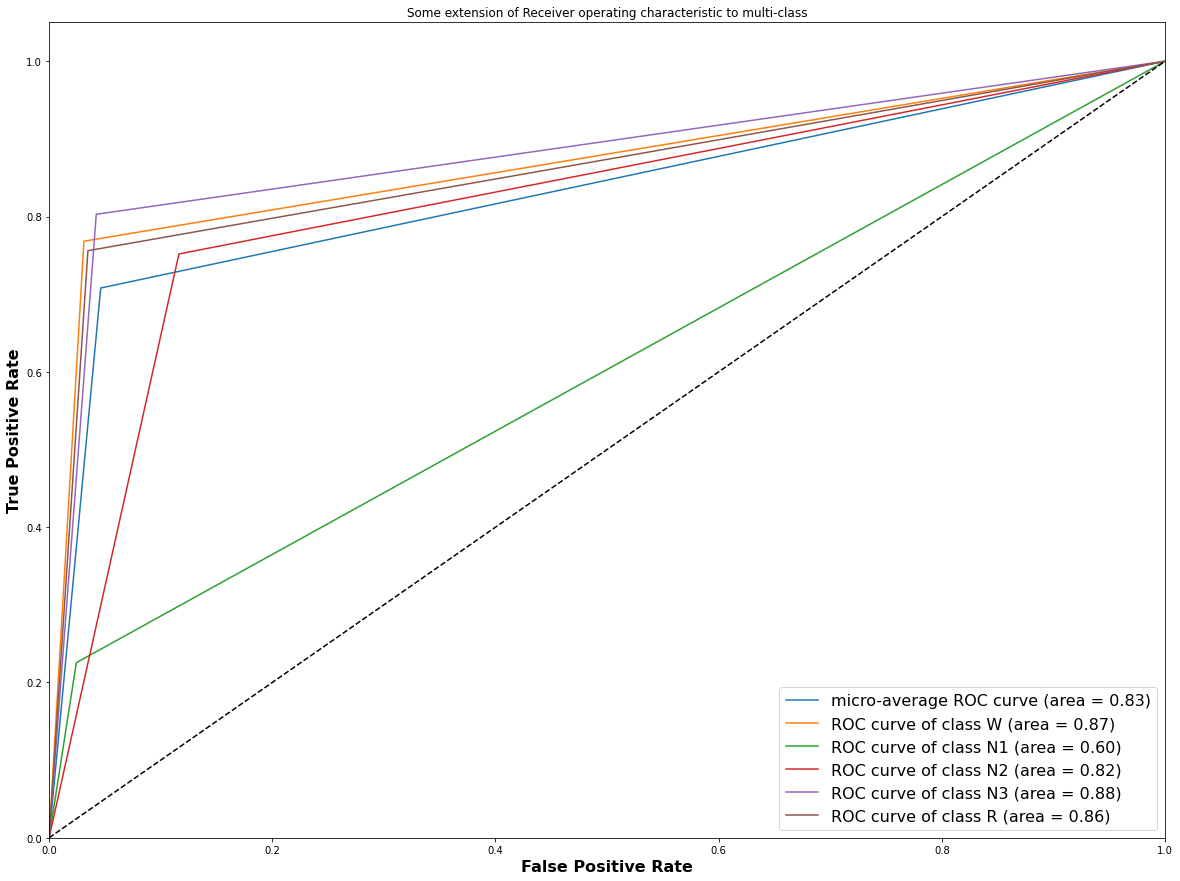

In [12]:
ROC(y_pred,cls)